In [ ]:
#Módulos básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP bibliotecas para tratamento e limpeza do texto
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

# Vetorização e aplicação do TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import re

#Verificando a eficacia do método e dividir o dataset
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Activation, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Modelos e verificação de acurácia
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#gráficos
import seaborn as sns
import matplotlib.pyplot as pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/base_TCC.csv", header = 0, index_col ='id', sep=';', dtype = {"classificacao" : "str"})

In [ ]:
type(dataframe)

pandas.core.frame.DataFrame

In [ ]:
dataframe.columns

Index(['noticia', 'classificacao'], dtype='object')

In [ ]:
dataframe

,noticia,classificacao
id,,
0,"""Protección de la familia""  Paraguai proíbe e...",1
1,Em evento realizado nesta terça-feira para div...,0
2,Cientistas testemunham as origens de ouro atra...,1
3,﻿Após o prefeito de Manaus Arthur Virgílio (PS...,0
4,"Angélica apoia exposição do ""homem nu"" e inter...",1
...,...,...
11938,Depois de ter sugerido em sua página no Facebo...,1
11939,Sem conseguir emprego desde que concluiu a fa...,0
11940,A top model aposentada Gisele Bündchen complet...,1


In [ ]:
df = dataframe.copy()

In [ ]:
df.isnull().sum()

noticia           1
classificacao    14
dtype: int64

In [ ]:
#Removendo os valores vazios e erros no dataset
df['noticia'] = df['noticia'].fillna('')
df['classificacao'] = df['classificacao'].fillna('')

In [ ]:
df.isnull().sum()

noticia          0
classificacao    0
dtype: int64

In [ ]:
#Stemmer e removendo stopwords

ps = PorterStemmer()
def wordopt(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.split()
    text = ' '.join(text)
    return text

In [ ]:
df['noticia'] = df['noticia'].apply(lambda x:wordopt(x))

In [ ]:
df.head()

,noticia,classificacao
id,,
0,protecci n de la familia paraguai pro be escol...,1
1,em evento realizado nesta ter a feira para div...,0
2,cientistas testemunham as origens de ouro atra...,1
3,ap s o prefeito de manaus arthur virg lio psdb...,0
4,ang lica apoia exposi o do homem nu e internau...,1


In [ ]:
X = df['noticia']
Y = df['classificacao']

In [ ]:
# Calculando o TF-IDF score do dataframe.
XV = TfidfVectorizer().fit_transform(X)

In [ ]:
XV.shape

(11950, 90439)

In [ ]:
#Separando as informações entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(XV, Y, test_size=0.25, random_state=5)

In [ ]:
print(type(x_train))
print(type(y_train))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'pandas.core.series.Series'>


In [ ]:
df = df.reset_index()

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf = 16, random_state=1)

#Fitting training set to the model
dt_model.fit(x_train,y_train)

#Predicting the test set results based on the model
dt_y_pred = dt_model.predict(x_test)

#Calculate the accuracy score of this model
score_dt = accuracy_score(y_test,dt_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_dt*100,2),'%')
# calculate prediction
precision_dt = precision_score(y_test, dt_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_dt*100,2),'%')
# calculate f1 score
f1_dt = f1_score(y_test, dt_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_dt*100,2),'%')
# calculate recall
recall_dt = recall_score(y_test, dt_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_dt*100,2),'%')

Accuracy of Logistic Regression model is:  89.93 %
Precision of Logistic Regression model is:  89.87 %
F1 score of Logistic Regression model is:  89.9 %
recall  score of Logistic Regression model is:  89.93 %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#utilizando random forest

RFC_model = RandomForestClassifier(criterion='gini', n_estimators=1000, max_depth=200, 
                                   min_samples_leaf=5, max_features = 'auto', random_state=1)
#Fitting training set to the model
RFC_model.fit(x_train, y_train)

#Predicting the test set results based on the model
rfc_y_pred = RFC_model.predict(x_test)

#Calculate the accuracy score of this model
score_rf = accuracy_score(y_test, rfc_y_pred)
print('Accuracy of random forest model is: ',round(score_rf*100,2),'%')
# calculate prediction
precision_rf = precision_score(y_test, rfc_y_pred, average = 'weighted', labels=np.unique(rfc_y_pred))
print('Precision of random forest model is: ',round(precision_rf*100,2),'%')
# calculate f1 score
f1_rf = f1_score(y_test, rfc_y_pred, average = 'weighted', labels=np.unique(rfc_y_pred))
print('F1 score of random forest model is: ',round(f1_rf*100,2),'%')
# calculate recall
recall_rf = recall_score(y_test, rfc_y_pred, average='weighted', labels=np.unique(rfc_y_pred))
print('recall  scoreof random forest model is: ',round(recall_rf*100,2),'%')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of random forest model is:  92.7 %
Precision of random forest model is:  93.08 %
F1 score of random forest model is:  92.72 %
recall  scoreof random forest model is:  92.77 %


In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')

#Fitting training set to the model
kn_model.fit(x_train,y_train)

#Predicting the test set results based on the model
kn_y_pred = kn_model.predict(x_test)

#Calculate the accuracy score of this model
score_kn = accuracy_score(y_test,kn_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_kn*100,2),'%')
# calculate prediction
precision_kn = precision_score(y_test, kn_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_kn*100,2),'%')
# calculate f1 score
f1_kn = f1_score(y_test, kn_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_kn*100,2),'%')
# calculate recall
recall_kn = recall_score(y_test, kn_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_kn*100,2),'%')

Accuracy of Logistic Regression model is:  10.31 %
Precision of Logistic Regression model is:  94.63 %
F1 score of Logistic Regression model is:  17.17 %
recall  score of Logistic Regression model is:  10.31 %


In [ ]:
# Treinando um modelo SVM utilizando SVC
SVM_model = svm.SVC(C=5, kernel='sigmoid', gamma='scale', probability=False, tol=0.001, cache_size=1000, random_state=1)

#Fitting training set to the model
SVM_model.fit(x_train,y_train)

#Predicting the test set results based on the model
SVM_y_pred = SVM_model.predict(x_test)

#Calculate the accuracy score of this model
score_SVM = accuracy_score(y_test,SVM_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_SVM*100,2),'%')
# calculate prediction
precision_SVM = precision_score(y_test, SVM_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_SVM*100,2),'%')
# calculate f1 score
f1_SVM = f1_score(y_test, SVM_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_SVM*100,2),'%')
# calculate recall
recall_SVM = recall_score(y_test, SVM_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_SVM*100,2),'%')

Accuracy of Logistic Regression model is:  95.58 %
Precision of Logistic Regression model is:  95.54 %
F1 score of Logistic Regression model is:  95.55 %
recall  score of Logistic Regression model is:  95.58 %


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Treinando um modelo utilizando regressão logistica
LR_model = LogisticRegression(tol=0.0001, fit_intercept=False, class_weight=None, solver='lbfgs', max_iter=300, random_state=1)

#Fitting training set to the model
LR_model.fit(x_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = LR_model.predict(x_test)

#Calculate the accuracy score of this model
score_lr = accuracy_score(y_test,lr_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_lr*100,2),'%')
# calculate prediction
precision_lr = precision_score(y_test, lr_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_lr*100,2),'%')
# calculate f1 score
f1_lr = f1_score(y_test, lr_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_lr*100,2),'%')
# calculate recall
recall_lr = recall_score(y_test, lr_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_lr*100,2),'%')

Accuracy of Logistic Regression model is:  93.51 %
Precision of Logistic Regression model is:  93.64 %
F1 score of Logistic Regression model is:  93.51 %
recall  score of Logistic Regression model is:  93.51 %


In [ ]:
# Treinando um modelo utilizando classificação passiva agressiva
PA_model = PassiveAggressiveClassifier(C = 10, max_iter=2000, n_iter_no_change = 600, random_state=1)

#Fitting training set to the model
PA_model.fit(x_train,y_train)

#Predicting the test set results based on the model
pa_y_pred = PA_model.predict(x_test)

#Calculate the accuracy score of this model
score_pa = accuracy_score(y_test,pa_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_pa*100,2),'%')
# calculate prediction
precision_pa = precision_score(y_test, pa_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_pa*100,2),'%')
# calculate f1 score
f1_pa = f1_score(y_test, pa_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_pa*100,2),'%')
# calculate recall
recall_pa = recall_score(y_test, pa_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_pa*100,2),'%')

Accuracy of Logistic Regression model is:  96.62 %
Precision of Logistic Regression model is:  96.56 %
F1 score of Logistic Regression model is:  96.59 %
recall  score of Logistic Regression model is:  96.62 %


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Treinando um modelo utilizando Adabost
from sklearn.ensemble import AdaBoostClassifier
Adab_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, algorithm='SAMME', random_state=1)

#Fitting training set to the model
Adab_model.fit(x_train,y_train)

#Predicting the test set results based on the model
Adab_y_pred = Adab_model.predict(x_test)

#Calculate the accuracy score of this model
score_Adab = accuracy_score(y_test,Adab_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_Adab*100,2),'%')
# calculate prediction
precision_Adab = precision_score(y_test, Adab_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_Adab*100,2),'%')
# calculate f1 score
f1_Adab = f1_score(y_test, Adab_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_Adab*100,2),'%')
# calculate recall
recall_Adab = recall_score(y_test, Adab_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_Adab*100,2),'%')

Accuracy of Logistic Regression model is:  89.99 %
Precision of Logistic Regression model is:  89.95 %
F1 score of Logistic Regression model is:  89.96 %
recall  score of Logistic Regression model is:  89.99 %


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 110.0)

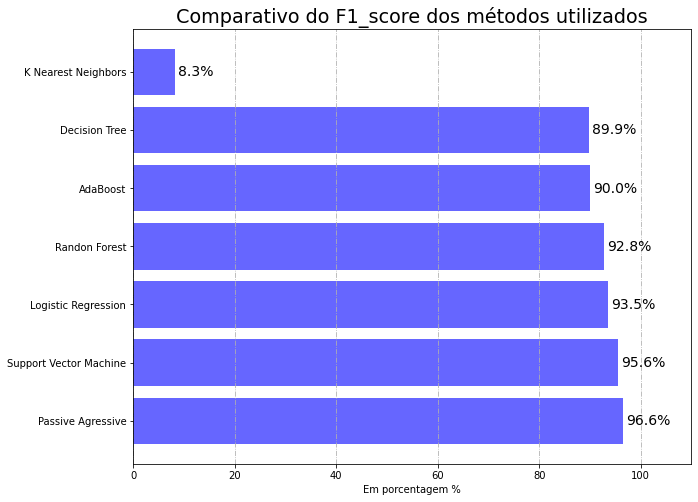

In [ ]:
#Gráfico comparativo de F1 Score
x_pos = ['Passive Agressive','Support Vector Machine','Logistic Regression', 'Randon Forest', 'AdaBoost', 'Decision Tree','K Nearest Neighbors']
y_pos = [96.6,95.6,93.5,92.8,90.0, 89.9,8.3]

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.size'] = 16

hbar = ax.barh(x_pos, y_pos, align='center', alpha=0.6, color = 'blue', capsize = 12)
ax.set_xlabel('Em porcentagem %')
ax.set_title('Comparativo do F1_score dos métodos utilizados')
ax.grid(which='both', axis='x',linestyle='-.')

# Label with specially formatted floats
ax.bar_label(hbar, fmt='%.1f%%', size=14, label_type="edge", padding=3)
ax.set_xlim(right=110)  # adjust xlim to fit labels



## Verificando a adaptabilidade do modelo a um cenário de um menor banco de dados.

In [ ]:
verdade2 = pd.read_excel('train2_true.xlsx')
mentira2 = pd.read_excel('train2_false.xlsx')

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
verdade2.head()

,noticia,classificacao
0,As praias são de rio e a floresta é amazônica....,0
1,Responsáveis por uma boa fatia do mercado de p...,0
2,As despedidas de solteiro (a) fazem parte da p...,0
3,"Mar azul-turquesa, finas areias brancas, coque...",0
4,Engana-se quem pensa que a Serra Gaúcha é melh...,0


In [ ]:
mentira2.head()

,noticia,classificacao
0,GRÊMIO PUNITIVO UNIDOS DA PAPUDA – Carnaval é ...,1.0
1,"SELIC, WE HAVE A PROBLEM – “Já procuramos por ...",1.0
2,ILHA DA FANTASIA- Crise na terra da magia. Com...,1.0
3,COPOMZÃO – Já diz o ditado que o futebol é uma...,1.0
4,TOP BUSINESS MODEL – Carnaval é época de fanta...,1.0


In [ ]:
print(verdade2.shape)
print(mentira2.shape)

(105, 2)
(95, 2)


In [ ]:
dataframe2 = pd.concat([verdade2,mentira2])
dataframe2.head()

,noticia,classificacao
0,As praias são de rio e a floresta é amazônica....,0.0
1,Responsáveis por uma boa fatia do mercado de p...,0.0
2,As despedidas de solteiro (a) fazem parte da p...,0.0
3,"Mar azul-turquesa, finas areias brancas, coque...",0.0
4,Engana-se quem pensa que a Serra Gaúcha é melh...,0.0


In [ ]:
DF2 = dataframe2.sample(frac=1)
print(DF2)

                                               noticia  classificacao
11   O governo federal iniciou as discussões com in...            0.0
92   Agora, aquelas fotos tiradas com seu ou sua ex...            0.0
55   Um levantamento da ONG ILGA-Europa apontou um ...            0.0
102  A empresa de cibersegurança Kaspersky alertou ...            0.0
25   As colombianas Shakira e Karol G lançaram, na ...            0.0
..                                                 ...            ...
38   Uma das pinturas do período azul de Pablo Pica...            0.0
9    No primeiro dia do autoembargo do Brasil às ex...            0.0
28   ACRÉSCIMOS FINAIS – Ele provoca, ele agita a t...            1.0
66   O vice-presidente da República e ministro do D...            0.0
36   O reconhecimento das qualidades arquitetônicas...            0.0

[200 rows x 2 columns]


In [ ]:
DF2.isnull().sum()

noticia          0
classificacao    0
dtype: int64

In [ ]:
#Stemmer

ps = PorterStemmer()
def clean(texto):
    texto = texto.lower()
    texto = re.sub('[^a-zA-Z]', ' ',texto)
    texto = texto.split()
    texto = ' '.join(texto)
    return texto

In [ ]:
DF2['noticia'] = DF2['noticia'].apply(lambda x:clean(x))

In [ ]:
DF2.head(5)

,noticia,classificacao
11,o governo federal iniciou as discuss es com in...,0.0
92,agora aquelas fotos tiradas com seu ou sua ex ...,0.0
55,um levantamento da ong ilga europa apontou um ...,0.0
102,a empresa de ciberseguran a kaspersky alertou ...,0.0
25,as colombianas shakira e karol g lan aram na n...,0.0


In [ ]:
Xa = DF2['noticia']
Ya = DF2['classificacao']

In [ ]:
X2 = TfidfVectorizer().fit_transform(Xa)

In [ ]:
X2.shape

(200, 12650)

In [ ]:
xa_train, xa_test, ya_train, ya_test = train_test_split(X2, Ya, test_size = 0.25)

In [ ]:
# Segundo treinamento KNN

kn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')

#Fitting training set to the model
kn_model.fit(xa_train,ya_train)

#Predicting the test set results based on the model
akn_y_pred = kn_model.predict(xa_test)

#Calculate the accuracy score of this model
score_kna = accuracy_score(ya_test,akn_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_kna*100,2),'%')
# calculate prediction
precision_kna = precision_score(ya_test, akn_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_kna*100,2),'%')
# calculate f1 score
f1_kna = f1_score(ya_test, akn_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_kna*100,2),'%')
# calculate recall
recall_kna = recall_score(ya_test, akn_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_kna*100,2),'%')

Accuracy of Logistic Regression model is:  74.0 %
Precision of Logistic Regression model is:  81.68 %
F1 score of Logistic Regression model is:  69.49 %
recall  score of Logistic Regression model is:  74.0 %


In [ ]:
# Segundo treinamento arvore de decisão

dt_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf = 16, random_state=4)

#Fitting training set to the model
dt_model.fit(xa_train,ya_train)

#Predicting the test set results based on the model
dta_y_pred = dt_model.predict(xa_test)

#Calculate the accuracy score of this model
score_dta = accuracy_score(ya_test,dta_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_dta*100,2),'%')
# calculate prediction
precision_dta = precision_score(ya_test, dta_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_dta*100,2),'%')
# calculate f1 score
f1_dta = f1_score(ya_test, dta_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_dta*100,2),'%')
# calculate recall
recall_dta = recall_score(ya_test, dta_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_dta*100,2),'%')

Accuracy of Logistic Regression model is:  98.0 %
Precision of Logistic Regression model is:  98.1 %
F1 score of Logistic Regression model is:  98.01 %
recall  score of Logistic Regression model is:  98.0 %


In [ ]:
# Segundo treinamento random forest

RFC_model = RandomForestClassifier(criterion='gini', n_estimators=1000, max_depth=200, 
                                   min_samples_leaf=5, max_features = 'auto', random_state=1)
#Fitting training set to the model
RFC_model.fit(xa_train, ya_train)

#Predicting the test set results based on the model
arfc_y_pred = RFC_model.predict(xa_test)

#Calculate the accuracy score of this model
score_rfa = accuracy_score(ya_test, arfc_y_pred)
print('Accuracy of random forest model is: ',round(score_rfa*100,2),'%')
# calculate prediction
precision_rfa = precision_score(ya_test, arfc_y_pred, average = 'weighted', labels=np.unique(arfc_y_pred))
print('Precision of random forest model is: ',round(precision_rfa*100,2),'%')
# calculate f1 score
f1_rfa = f1_score(ya_test, arfc_y_pred, average = 'weighted', labels=np.unique(arfc_y_pred))
print('F1 score of random forest model is: ',round(f1_rfa*100,2),'%')
# calculate recall
recall_rfa = recall_score(ya_test, arfc_y_pred, average='weighted', labels=np.unique(arfc_y_pred))
print('recall  scoreof random forest model is: ',round(recall_rfa*100,2),'%')

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of random forest model is:  98.0 %
Precision of random forest model is:  98.1 %
F1 score of random forest model is:  98.01 %
recall  scoreof random forest model is:  98.0 %


In [ ]:
# Segundo treinamento utilizando Adabost
from sklearn.ensemble import AdaBoostClassifier
Adab_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, algorithm='SAMME', random_state=4)

#Fitting training set to the model
Adab_model.fit(xa_train,ya_train)

#Predicting the test set results based on the model
Adab_y_preda = Adab_model.predict(xa_test)

#Calculate the accuracy score of this model
score_Adaba = accuracy_score(ya_test,Adab_y_preda)
print('Accuracy of Logistic Regression model is: ',round(score_Adaba*100,2),'%')
# calculate prediction
precision_Adaba = precision_score(ya_test, Adab_y_preda, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_Adaba*100,2),'%')
# calculate f1 score
f1_Adaba = f1_score(ya_test, Adab_y_preda, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_Adaba*100,2),'%')
# calculate recall
recall_Adaba = recall_score(ya_test, Adab_y_preda, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_Adaba*100,2),'%')

Accuracy of Logistic Regression model is:  98.0 %
Precision of Logistic Regression model is:  98.1 %
F1 score of Logistic Regression model is:  98.01 %
recall  score of Logistic Regression model is:  98.0 %


In [ ]:
# Segundo treinamento SVM utilizando SVC
SVM_model = svm.SVC(C=5, kernel='sigmoid', gamma='scale', probability=False, tol=0.001, cache_size=1000, random_state=4)

#Fitting training set to the model
SVM_model.fit(xa_train,ya_train)

#Predicting the test set results based on the model
aSVM_y_pred = SVM_model.predict(xa_test)

#Calculate the accuracy score of this model
score_SVMa = accuracy_score(ya_test,aSVM_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_SVMa*100,2),'%')
# calculate prediction
precision_SVMa = precision_score(ya_test, aSVM_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_SVMa*100,2),'%')
# calculate f1 score
f1_SVMa = f1_score(ya_test, aSVM_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_SVMa*100,2),'%')
# calculate recall
recall_SVMa = recall_score(ya_test, aSVM_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_SVMa*100,2),'%')

Accuracy of Logistic Regression model is:  100.0 %
Precision of Logistic Regression model is:  100.0 %
F1 score of Logistic Regression model is:  100.0 %
recall  score of Logistic Regression model is:  100.0 %


In [ ]:
# Segundo treinamento regressão logistica
LR_model = LogisticRegression(tol=0.0001, fit_intercept=False, class_weight=None, solver='lbfgs', max_iter=300, random_state=4)

#Fitting training set to the model
LR_model.fit(xa_train,ya_train)

#Predicting the test set results based on the model
alr_y_pred = LR_model.predict(xa_test)

#Calculate the accuracy score of this model
score_lra = accuracy_score(ya_test,alr_y_pred)
print('Accuracy of Logistic Regression model is: ',round(score_lra*100,2),'%')
# calculate prediction
precision_lra = precision_score(ya_test, alr_y_pred, average = 'weighted')
print('Precision of Logistic Regression model is: ',round(precision_lra*100,2),'%')
# calculate f1 score
f1_lra = f1_score(ya_test, alr_y_pred, average = 'weighted')
print('F1 score of Logistic Regression model is: ',round(f1_lra*100,2),'%')
# calculate recall
recall_lra = recall_score(ya_test, alr_y_pred, average='weighted')
print('recall  score of Logistic Regression model is: ',round(recall_lra*100,2),'%')

Accuracy of Logistic Regression model is:  100.0 %
Precision of Logistic Regression model is:  100.0 %
F1 score of Logistic Regression model is:  100.0 %
recall  score of Logistic Regression model is:  100.0 %


In [ ]:
# Segundo treinamento passiva agressiva
PA_model = PassiveAggressiveClassifier(C = 10, max_iter=2000, n_iter_no_change = 600, random_state=4)

#Fitting training set to the model
PA_model.fit(xa_train,ya_train)

#Predicting the test set results based on the model
pa_ya_pred = PA_model.predict(xa_test)

#Calculate the accuracy score of this model
score_pa = accuracy_score(ya_test,pa_ya_pred)
print('New accuracy of Logistic Regression model is: ',round(score_pa*100,2),'%')
# calculate prediction
precision_pa = precision_score(ya_test, pa_ya_pred, average = 'weighted')
print('New precision of Logistic Regression model is: ',round(precision_pa*100,2),'%')
# calculate f1 score
f1_pa = f1_score(ya_test, pa_ya_pred, average = 'weighted')
print('New F1 score of Logistic Regression model is: ',round(f1_pa*100,2),'%')
# calculate recall
recall_pa = recall_score(ya_test, pa_ya_pred, average='weighted')
print('New recall  score of Logistic Regression model is: ',round(recall_pa*100,2),'%')

New accuracy of Logistic Regression model is:  100.0 %
New precision of Logistic Regression model is:  100.0 %
New F1 score of Logistic Regression model is:  100.0 %
New recall  score of Logistic Regression model is:  100.0 %


(0.0, 112.0)

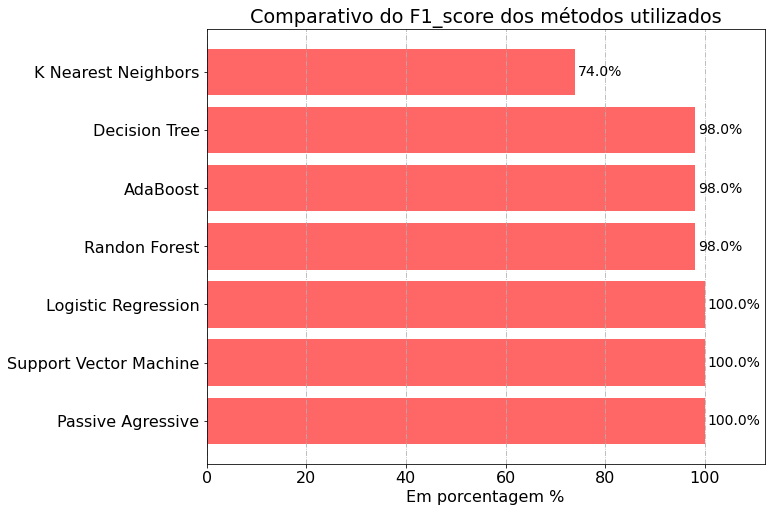

In [ ]:
#Gráfico comparativo de F1 Score da base de revisão
xa_pos = ('Passive Agressive','Support Vector Machine','Logistic Regression', 'Randon Forest', 'AdaBoost','Decision Tree','K Nearest Neighbors')
ya_pos = [100,100,100,98,98,98,74]

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.size'] = 16

habar = ax.barh(xa_pos, ya_pos, align='center', alpha=0.6, color = 'red', capsize = 12)
ax.set_xlabel('Em porcentagem %')
ax.set_title('Comparativo do F1_score dos métodos utilizados')
ax.grid(which='both', axis='x',linestyle='-.')

# Label with specially formatted floats
ax.bar_label(habar, fmt='%.1f%%', size=14, label_type="edge", padding=3)
ax.set_xlim(right=112)  # adjust xlim to fit labels

In [ ]:
#gráfico combinado

(0.0, 110.0)

<Figure size 720x576 with 0 Axes>

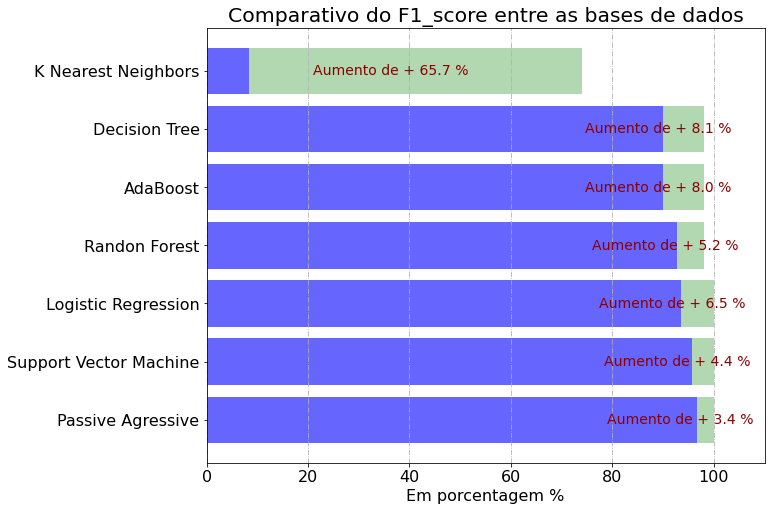

In [ ]:
txa_pos = ('Passive Agressive','Support Vector Machine', 'Logistic Regression', 'Randon Forest', 'AdaBoost','Decision Tree','K Nearest Neighbors')
tya_pos = [100,100,100,98,98,98,74]

plt.figure(figsize=(10, 8))
dy_pos = []
plt.rcParams['font.size'] = 16

for i, j in zip(tya_pos,y_pos):
     dy_pos.append(i - j)

part1 = []
for e in range (0,7):
  part1.append(('Aumento de +',str(round(dy_pos[e],1)),'%'))

label = []
for l in range (0,7):
  label.append(' '.join(part1[l]))

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.size'] = 17

hcbar = ax.barh(x_pos, y_pos, alpha=0.6, height = 0.8, color='blue', capsize = 12)
hccbar = ax.barh(x_pos, dy_pos, left=y_pos, height = 0.8, alpha=0.3, color='green', capsize = 12)
ax.set_xlabel('Em porcentagem %')
ax.set_title('Comparativo do F1_score entre as bases de dados')
ax.grid(which='both', axis='x',linestyle='-.')

# Label with specially formatted floats
ax.bar_label(hccbar, labels = label, size=14, label_type="center", padding=-25, color='darkred')
ax.set_xlim(right=110)  # adjust xlim to fit labels